<a href="https://colab.research.google.com/github/Saifullah785/hands-on-ml-notes-practice/blob/main/CHAPTER_01_The_Machine_Learning_Landscape/Chapter_01_Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 1: The Machine Learning Landscape**


---


**1. What is Machine Learning?**

**Definition:**

ML is the science and art of teaching computers to learn from data — without being explicitly programmed.

**Arthur Samuel (1959):**

“Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed.”

**Tom Mitchell’s Formal Definition (1997):**

A computer program is said to learn from experience E with respect to some task T and performance measure P, if its performance at task T, as measured by P, improves with experience E.

**Real-world Practical Analogy:**

Think of a baby learning to walk. Nobody gives the baby step-by-step instructions.

The baby tries (data), falls (feedback), tries again (iteration).

That’s learning from experience.

**2. Why Use Machine Learning?**

Traditional programming approach:

You define rules and logic → feed it into the system → system performs tasks.

ML-based approach:

Feed data + desired outcome → algorithm learns the logic itself.

Problem with traditional systems:

Hard to scale

Fragile with changing environments

High maintenance

Complex logic with too many rules

**🛠️ ML Benefit:**

Learn from patterns in data → automatically improve without rewriting code.

**Real Example:**

Imagine trying to write rules to detect spam emails.

There are too many patterns, and spammers keep changing tactics.

ML can adapt to new patterns and is more effective than hardcoded rules.

# **3. Applications of Machine Learning**

Here are practical use cases organized by task type:

| Task                      | ML Type                   | Algorithm/Method Used                 | Real-World Example                       |
| ------------------------- | ------------------------- | ------------------------------------- | ---------------------------------------- |
| Image Classification      | Supervised                | CNNs (ConvNets)                       | Identify cats vs dogs in photos          |
| Semantic Segmentation     | Supervised                | CNN + Pixel-wise classification       | Brain tumor detection in MRI             |
| Text Classification (NLP) | Supervised                | RNNs, Transformers                    | Spam detection, sentiment analysis       |
| Chatbots & NLU            | Supervised                | Transformer-based NLU + QA models     | Customer service, AI assistants          |
| Revenue Forecasting       | Regression                | Linear Regression, ANN, Random Forest | Predict future product sales             |
| Speech Recognition        | Supervised                | CNNs, RNNs, Transformers              | Voice-to-text systems like Siri, Alexa   |
| Credit Fraud Detection    | Supervised / Unsupervised | Isolation Forest, SVM, Autoencoders   | Flag suspicious credit card transactions |
| Client Segmentation       | Unsupervised              | K-means, DBSCAN                       | Marketing segmentation                   |
| Dimensionality Reduction  | Unsupervised              | PCA, t-SNE, Autoencoders              | Visualizing high-dimensional gene data   |
| Recommendation Systems    | Supervised / Unsupervised | Neural CF, Seq2Seq                    | Amazon product recommendations           |


# **4. Types of Machine Learning Systems**

**A. Supervised Learning**

You provide both inputs and labeled outputs (correct answers).

Task: Learn a mapping from inputs to output.

**Two major tasks:**

Classification (e.g., spam or not spam)

Regression (e.g., predict temperature)

**Common Algorithms:**

K-Nearest Neighbors (KNN)

Linear / Logistic Regression

Decision Trees, Random Forest

Support Vector Machines (SVM)

Neural Networks

**B. Unsupervised Learning**

You provide only inputs — no labels.

Goal: Find patterns, structure, or anomalies in data.

**Tasks:**

Clustering (e.g., group similar customers)

Anomaly Detection (e.g., fraud detection)

Dimensionality Reduction (e.g., PCA, t-SNE)

**Common Algorithms:**

K-Means, DBSCAN, Hierarchical Clustering

Isolation Forest, One-Class SVM

PCA, t-SNE, Autoencoders

**C. Semi-Supervised Learning**

Mix of few labeled + many unlabeled data.

Often used in real-life, where labeling is costly (e.g., medical imaging).

Practical Usage: Use unsupervised model to pretrain and supervised learning to fine-tune.

**D. Reinforcement Learning**

The model (agent) interacts with an environment, learns by trial and error, and receives rewards or penalties.

**Famous Use Cases:**

AlphaGo, game AI

Self-driving cars

Robot navigation

**Core Components:**

Agent

Environment

Policy

Reward signal

# **5. Batch vs Online Learning**

| Feature       | Batch Learning                    | Online Learning                           |
| ------------- | --------------------------------- | ----------------------------------------- |
| Learning mode | Trained on full data (offline)    | Learns incrementally (streaming)          |
| Adaptability  | Needs retraining on new data      | Adapts to new data on the fly             |
| Use Case      | Stable environments (e.g. census) | Real-time systems (e.g. stock trading)    |
| Risk          | Robust but slow                   | Fast but can be misled by noise/anomalies |


# **6. Instance-based vs Model-based Learning**

**Instance-based Learning (Lazy Learning)**

Memorizes data points

Makes predictions by comparing to stored data

**Example:**

KNN → predicts based on closest neighbors

**Use When:**

Dataset is small

Patterns are local or specific

**Model-based Learning (Eager Learning)**

Learns a model that generalizes from training data

**Example:**

Linear Regression → builds a formula/model from data

**Use When:**

You want general rules

Model needs to run quickly in production

# **7. Challenges in Machine Learning**

**Insufficient Data**

Quality and quantity of data are critical. Use data augmentation, web scraping, or synthetic data generation.

**Non-representative Data**

Bias in data = biased model. Stratify sampling, check class balance.

**Overfitting / Underfitting**

Use cross-validation, regularization, pruning, etc.

**Data Leakage**

When test data “leaks” into training phase. Watch feature engineering & pipelines.

**Scaling to Production**

Monitor live models, retrain with new data, implement CI/CD for ML (MLOps).

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [19]:
# Load GDP and OECD data from URLs
# URLs for data

gdp  = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

oecd = pd.read_csv("oecd.csv", thousands=',')[['Country', 'Indicator', 'Measure', 'Inequality', 'Unit', 'PowerCode', 'Value']]

In [20]:
# Display the first few rows of the GDP DataFrame
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [21]:
# Display the first few rows of the OECD DataFrame
oecd.head()

,Country,Indicator,Measure,Inequality,Unit,PowerCode,Value
0,Australia,Labour market insecurity,Value,Total,Percentage,Units,5.4
1,Austria,Labour market insecurity,Value,Total,Percentage,Units,3.5
2,Belgium,Labour market insecurity,Value,Total,Percentage,Units,3.7
3,Canada,Labour market insecurity,Value,Total,Percentage,Units,6.0
4,Czech Republic,Labour market insecurity,Value,Total,Percentage,Units,3.1


In [22]:
# Filter OECD data to get countries and Life satisfaction
# Get countries + Life satisfaction
oecd = oecd[['Country', 'Value']][oecd['Indicator'] == 'Life satisfaction']

In [23]:
# Rename the 'Value' column to 'Life satisfaction' in the OECD DataFrame
# Get countries + Life satisfaction
# oecd = oecd[['Country', 'Value']][oecd['Indicator'] == 'Life satisfaction']
oecd = oecd.rename(columns={'Value': 'Life satisfaction'})
oecd.head()

,Country,Life satisfaction
1812,Australia,7.3
1813,Austria,7.1
1814,Belgium,6.9
1815,Canada,7.4
1816,Czech Republic,6.7


In [24]:
# Filter and rename columns in the GDP DataFrame
# Get countries  + GDP
gdp = gdp[['Country', '2015']]
gdp = gdp.rename(columns={'2015': 'GDP per capita (USD)'})

# filter to get a similar dataframe to the book's
gdp = gdp[gdp['GDP per capita (USD)'] <=60000]
gdp.head()

,Country,GDP per capita (USD)
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


In [25]:
# Merge GDP and Life satisfaction data and group by country
# Join GDP & Life satisfaction tables + Group by country as the unique column and average aggregate GDP & Life satisfaction
country_stats = pd.merge(gdp, oecd, on='Country').groupby(['Country']).mean().reset_index()

country_stats.head()

,Country,GDP per capita (USD),Life satisfaction
0,Australia,50961.865,7.350
1,Austria,43724.031,7.225
2,Belgium,40106.632,7.000
3,Brazil,8669.998,6.400
4,Canada,43331.961,7.425


In [26]:
# Prepare data for modeling (GDP for X, Life Satisfaction for y)
# get GDP for the x axis and Life Satisfaction for the y-axis
X = country_stats['GDP per capita (USD)'].values.reshape(-1, 1)
y = country_stats['Life satisfaction'].values.reshape(-1, 1)
X.shape, y.shape

((37, 1), (37, 1))

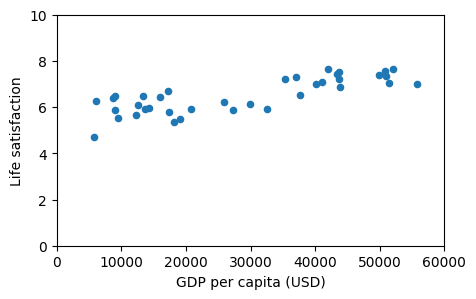

In [27]:
# Visualize the relationship between GDP and Life Satisfaction

country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 60000, 0, 10])
plt.show()

In [28]:
# Select a Linear Regression model

model = sklearn.linear_model.LinearRegression()

In [29]:
# Train the Linear Regression model

model.fit(X, y)

LinearRegression()

In [30]:
# Make a prediction using the trained model for Cyprus

X_new = [[22587]] # Cyprus GDP per capita
print(model.predict(X_new))

[[6.2910907]]


In [31]:
# Generate predicted values for plotting the linear model
# Let's visualize our model, because it's a Linear one, we can plot it using two points
X = [[10000],[50000]]
y_hat = model.predict(X)
y_hat

array([[5.81746512],
       [7.32259131]])

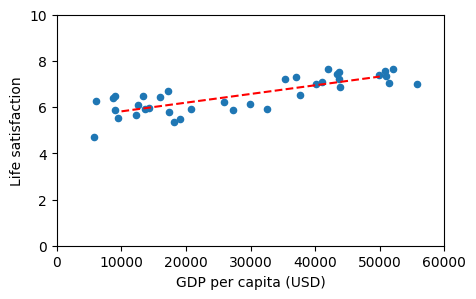

In [32]:
# Visualize the data along with the fitted linear model
# Visulaize the Data
country_stats.plot(kind='scatter', x='GDP per capita (USD)', y='Life satisfaction', figsize=(5, 3))
plt.axis([0, 60000, 0, 10])
plt.plot(X, y_hat, 'r--')
plt.show()